In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
# Estandardizar el estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')
# Configurar el estilo de seaborn
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.2) # Configuración de estilo de seaborn
plt.rcParams['figure.figsize'] = (12, 6) # Tamaño por defecto de las figuras
plt.rcParams['font.size'] = 12 # Tamaño de fuente por defecto


In [3]:
# Vizualizar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

In [4]:
# Cargar el dataset
df = pd.read_csv('sales_data.csv')

# Mostrar las primeras filas del DataFrame
print(f'Primeras Filas del Dataframe:\n{df.head(5)}')

# Descripcion estadística del Dataframe
print(f'\nDescripción estadística del Dataframe:\n{df.describe()}')

# Ultimas filas del DataFrame
print(f'\nUltimas Filas del Dataframe:\n{df.tail(5)}')



Primeras Filas del Dataframe:
   Order ID        Date             Product  Price  Quantity Purchase Type  \
0     10452  07-11-2022               Fries   3.49    573.07       Online    
1     10453  07-11-2022           Beverages   2.95    745.76       Online    
2     10454  07-11-2022       Sides & Other   4.99    200.40     In-store    
3     10455  08-11-2022             Burgers  12.99    569.67     In-store    
4     10456  08-11-2022  Chicken Sandwiches   9.95    201.01     In-store    

  Payment Method             Manager    City  
0      Gift Card    Tom      Jackson  London  
1      Gift Card         Pablo Perez  Madrid  
2      Gift Card       Joao    Silva  Lisbon  
3    Credit Card       Walter Muller  Berlin  
4    Credit Card       Walter Muller  Berlin  

Descripción estadística del Dataframe:
           Order ID       Price    Quantity
count    254.000000  254.000000  254.000000
mean   10584.133858    7.102323  460.611457
std       75.889181    4.341855  214.888699
min

In [5]:
# tamaño del DataFrame
print(f'\nTamaño del Dataframe:\n{df.shape}')

# Valores Nulos
print(f'\nValores Nulos del Dataframe:\n{df.isnull().sum()}')

# Tipos de Datos
print(f'\nTipos de Datos del Dataframe:\n{df.dtypes}')


Tamaño del Dataframe:
(254, 9)

Valores Nulos del Dataframe:
Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

Tipos de Datos del Dataframe:
Order ID            int64
Date               object
Product            object
Price             float64
Quantity          float64
Purchase Type      object
Payment Method     object
Manager            object
City               object
dtype: object


In [6]:
# Columnas del DataFrame
print(f'\nColumnas del Dataframe:\n{df.columns}')

# Columnas con valores únicos
for column in df.columns:
    unique_values = df[column].nunique()
    print(f'Columna: {column} - Valores únicos: {unique_values}')   


Columnas del Dataframe:
Index(['Order ID', 'Date', 'Product', 'Price', 'Quantity', 'Purchase Type',
       'Payment Method', 'Manager', 'City'],
      dtype='object')
Columna: Order ID - Valores únicos: 254
Columna: Date - Valores únicos: 53
Columna: Product - Valores únicos: 5
Columna: Price - Valores únicos: 7
Columna: Quantity - Valores únicos: 29
Columna: Purchase Type - Valores únicos: 3
Columna: Payment Method - Valores únicos: 3
Columna: Manager - Valores únicos: 14
Columna: City - Valores únicos: 5


In [7]:
# Columnas calculadas
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce') # Convertir la columna 'Date' a tipo datetime, errors='coerce' para manejar errores
df['Price'] = df['Price'].astype(float) # Asegurar que 'Price' sea de tipo float
df['Quantity'] = df['Quantity'].astype(int) # Asegurar que 'Quantity' sea de tipo int
df['total_sales'] = df['Quantity'] * df['Price'].round(2)
df['mes'] = df['Date'].dt.month_name()
df['año'] = df['Date'].dt.year
df['dia_semana'] = df['Date'].dt.day_name()
df['fin_de_semana'] = df['Date'].dt.dayofweek >= 5
# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(f'\nPrimeras Filas del Dataframe con columnas calculadas:\n{df.head(10)}')


Primeras Filas del Dataframe con columnas calculadas:
   Order ID       Date             Product  Price  Quantity Purchase Type  \
0     10452 2022-11-07               Fries   3.49       573       Online    
1     10453 2022-11-07           Beverages   2.95       745       Online    
2     10454 2022-11-07       Sides & Other   4.99       200     In-store    
3     10455 2022-11-08             Burgers  12.99       569     In-store    
4     10456 2022-11-08  Chicken Sandwiches   9.95       201     In-store    
5     10457 2022-11-08               Fries   3.49       573     In-store    
6     10459 2022-11-08       Sides & Other   4.99       200     In-store    
7     10460 2022-11-09             Burgers  12.99       554     In-store    
8     10461 2022-11-09  Chicken Sandwiches   9.95       201     In-store    
9     10462 2022-11-09               Fries   3.49       573     In-store    

  Payment Method             Manager    City  total_sales       mes   año  \
0      Gift Card    

In [8]:
# información del DataFrame
print(f'\nInformación del Dataframe:\n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
 9   total_sales     254 non-null    float64       
 10  mes             254 non-null    object        
 11  año             254 non-null    int32         
 12  dia_semana      254 non-null    object        
 13  fin_de_semana   254 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64

--- ANÁLISIS UNIVARIANTE ---

In [9]:
# columnas numericas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'\nColumnas numéricas del Dataframe:\n{numeric_columns}')
# excluir columnas no relevantes
numeric_columns = [col for col in numeric_columns if col not in ['Order ID', 'año']]
# Mostrar las columnas numéricas
print(f'\nColumnas numéricas del Dataframe (excluyendo "order_id"):\n{numeric_columns}')



Columnas numéricas del Dataframe:
['Order ID', 'Price', 'Quantity', 'total_sales', 'año']

Columnas numéricas del Dataframe (excluyendo "order_id"):
['Price', 'Quantity', 'total_sales']


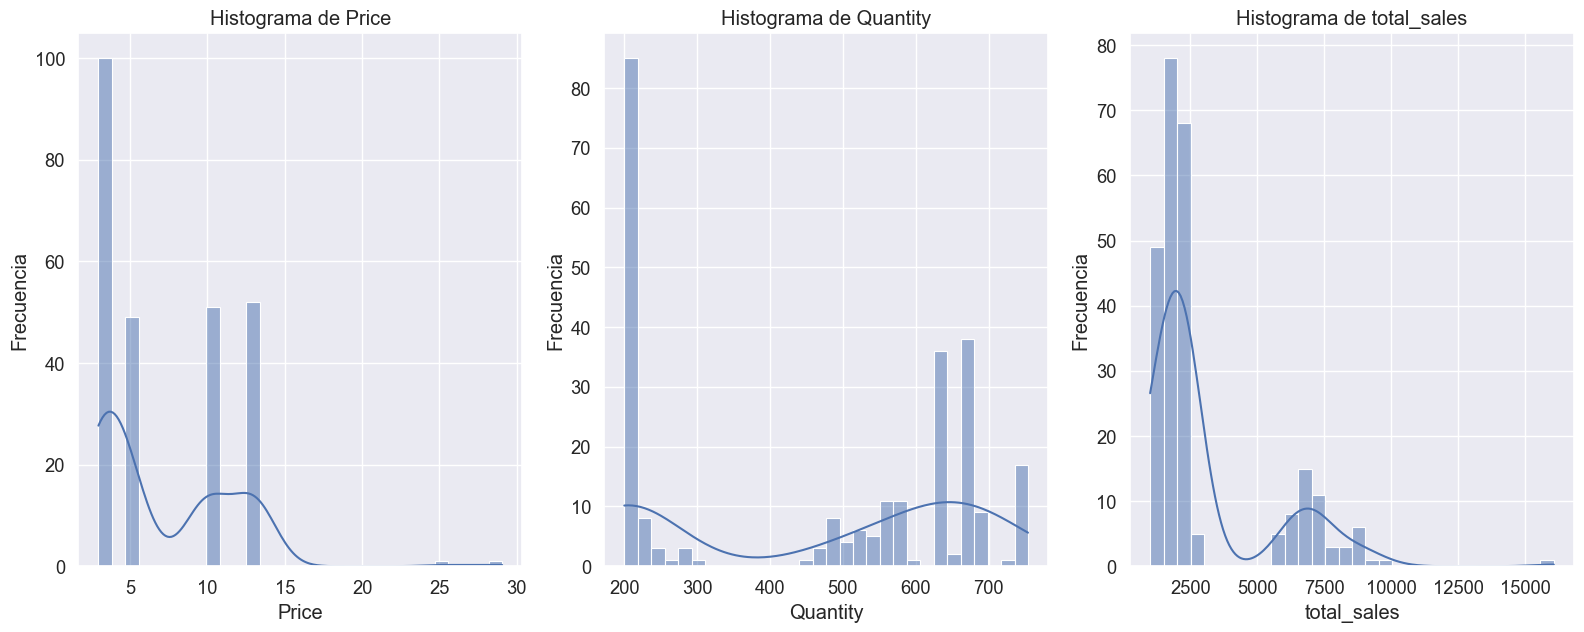

In [10]:
#  creación de histogramas para las columnas numéricas
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

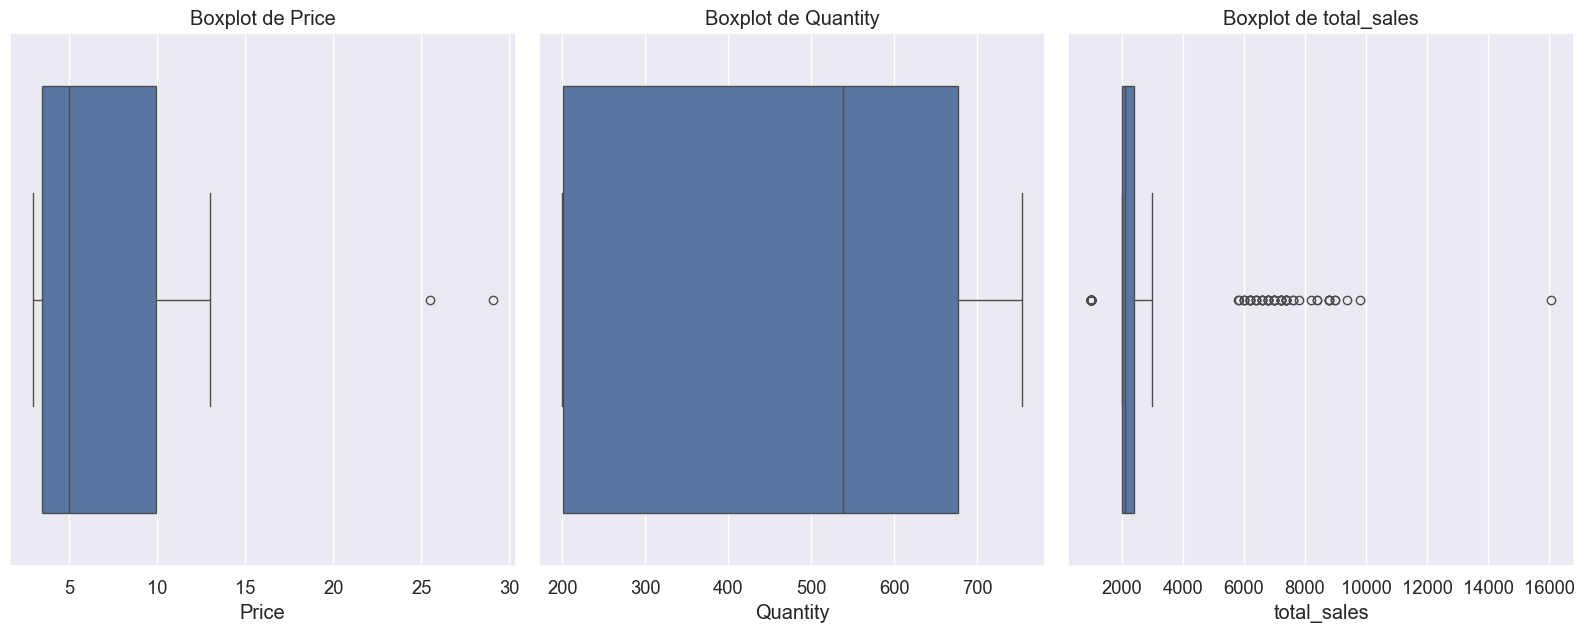

In [11]:
# boxplot para detectar valores atípicos
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [12]:
# Estadísticas descriptivas de las columnas numéricas
for col in numeric_columns:
    try:
        print(f'\nEstadísticas descriptivas de {col} por categoría')
        stats = df[col].describe(percentiles=[0.1, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
        print(f'Percentiles de {col}:\n{stats}')
    except Exception as e:
        print(f"Error al procesar la columna {col}: {e}")


Estadísticas descriptivas de Price por categoría
Percentiles de Price:
count    254.000000
mean       7.102323
std        4.341855
min        2.950000
5%         2.950000
10%        2.950000
25%        3.490000
50%        4.990000
75%        9.950000
90%       12.990000
95%       12.990000
99%       12.990000
max       29.050000
Name: Price, dtype: float64

Estadísticas descriptivas de Quantity por categoría
Percentiles de Quantity:
count    254.000000
mean     460.165354
std      214.691976
min      200.000000
5%       200.000000
10%      200.000000
25%      201.000000
50%      538.000000
75%      677.000000
90%      687.000000
95%      745.000000
99%      745.000000
max      754.000000
Name: Quantity, dtype: float64

Estadísticas descriptivas de total_sales por categoría
Percentiles de total_sales:
count      254.000000
mean      3026.896772
std       2418.193128
min        998.000000
5%         998.000000
10%        998.000000
25%       1997.150000
50%       2098.850000
75%       2

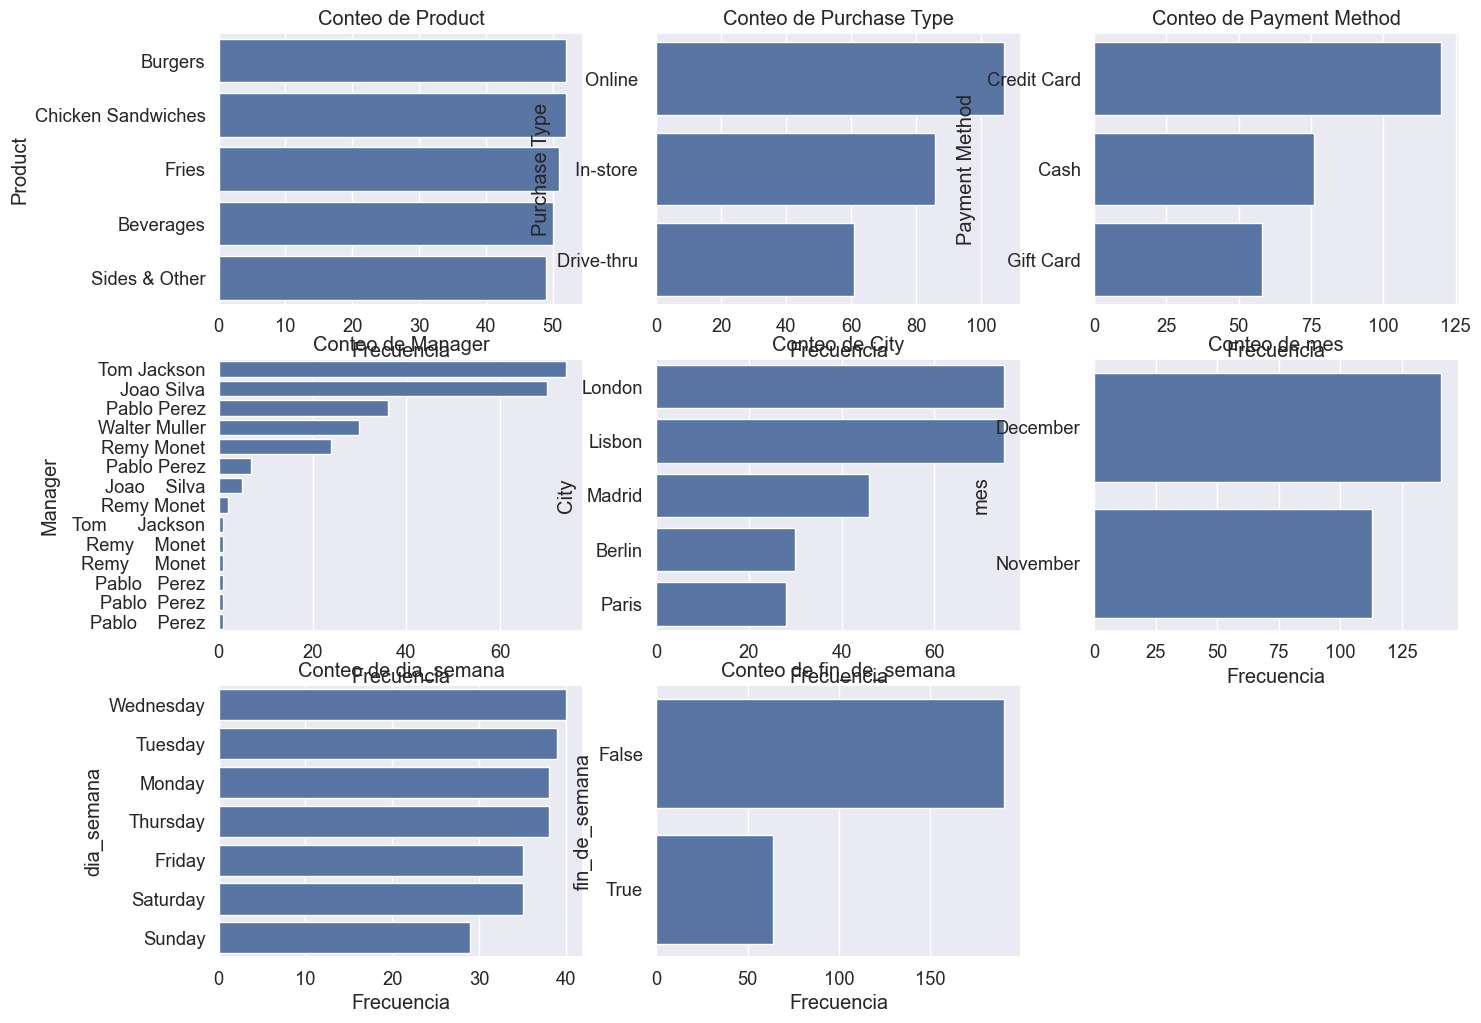

In [ ]:
# columnas categóricas
columns_categoricas = df.select_dtypes(include=['object','bool']).columns.tolist()
columns_categoricas = [col for col in columns_categoricas if col not in ['Date']]

# grafica de conteo para variables categóricas
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns_categoricas, 1):
    order=df[col].value_counts().index # ordenar los valores
    plt.subplot(3, 3, i) # subplots de 3 filas y 3 columnas
    sns.countplot(y=df[col], order=order)
    plt.title(f'Conteo de {col}')
    plt.xlabel('Frecuencia')

    plt.ylabel(col)

In [14]:
# tablas de frecuencias para variables categóricas
for col in columns_categoricas:
    try:
        print(f'\nTabla de frecuencias de {col}')
        freq_table = df[col].value_counts(normalize=True).round(2) # Normalizar para obtener porcentajes
        print(freq_table)
    except Exception as e:
        print(f"Error al procesar la columna {col}: {e}")


Tabla de frecuencias de Product
Product
Burgers               0.20
Chicken Sandwiches    0.20
Fries                 0.20
Beverages             0.20
Sides & Other         0.19
Name: proportion, dtype: float64

Tabla de frecuencias de Purchase Type
Purchase Type
Online         0.42
In-store       0.34
Drive-thru     0.24
Name: proportion, dtype: float64

Tabla de frecuencias de Payment Method
Payment Method
Credit Card    0.47
Cash           0.30
Gift Card      0.23
Name: proportion, dtype: float64

Tabla de frecuencias de Manager
Manager
Tom Jackson           0.29
Joao Silva            0.28
Pablo Perez           0.14
Walter Muller         0.12
Remy Monet            0.09
       Pablo Perez    0.03
Joao    Silva         0.02
       Remy Monet     0.01
Tom      Jackson      0.00
Remy    Monet         0.00
Remy     Monet        0.00
Pablo   Perez         0.00
Pablo  Perez          0.00
Pablo    Perez        0.00
Name: proportion, dtype: float64

Tabla de frecuencias de City
City
London    

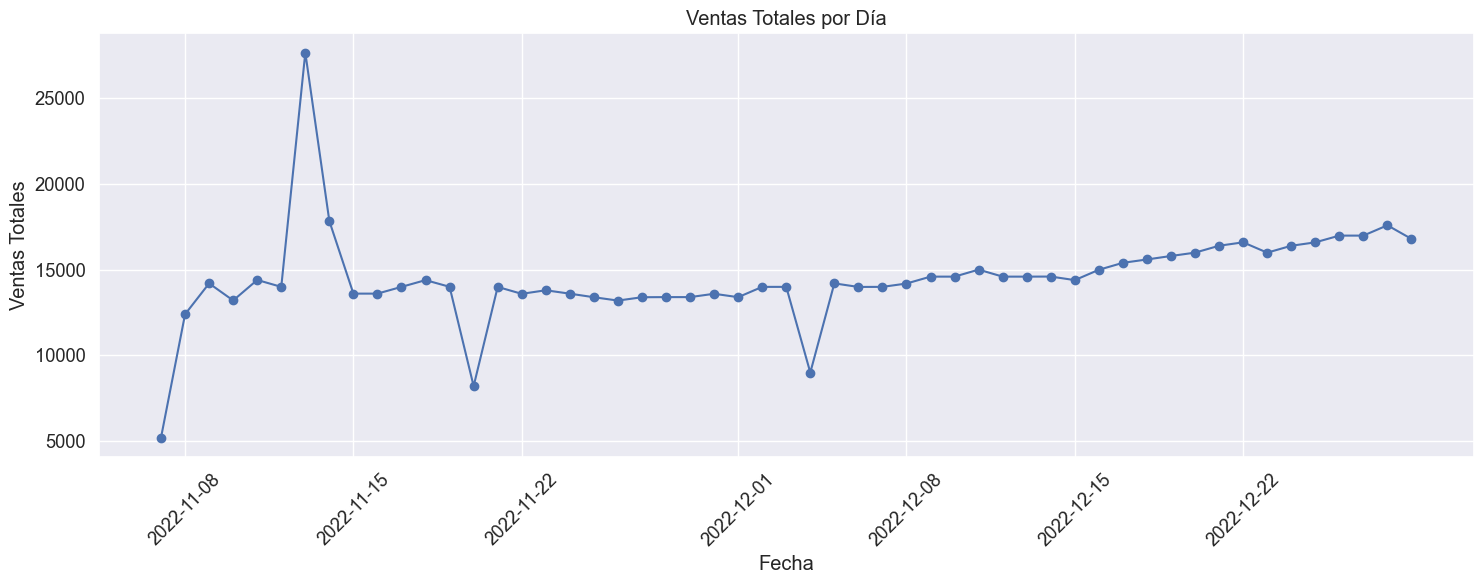

In [15]:
# tendencias temporales
plt.figure(figsize=(15, 6))
ventas_por_dia = df.groupby('Date')['total_sales'].sum().reset_index()
plt.plot(ventas_por_dia['Date'], ventas_por_dia['total_sales'], marker='o')
plt.title('Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
print(df['mes'])

0      November
1      November
2      November
3      November
4      November
         ...   
249    December
250    December
251    December
252    December
253    December
Name: mes, Length: 254, dtype: object


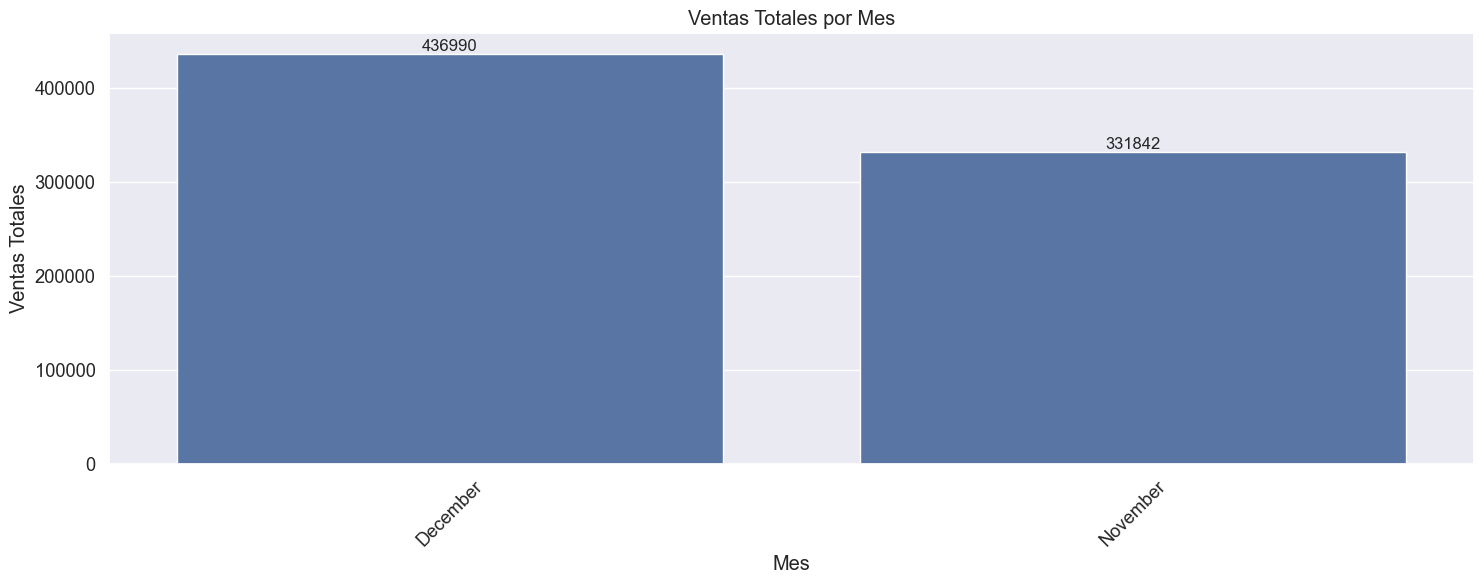

In [34]:
# ventas por mes
plt.figure(figsize=(15, 6))
ventas_por_mes = df.groupby('mes')['total_sales'].sum().reset_index()
ax = sns.barplot(x='mes', y='total_sales', data=ventas_por_mes)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

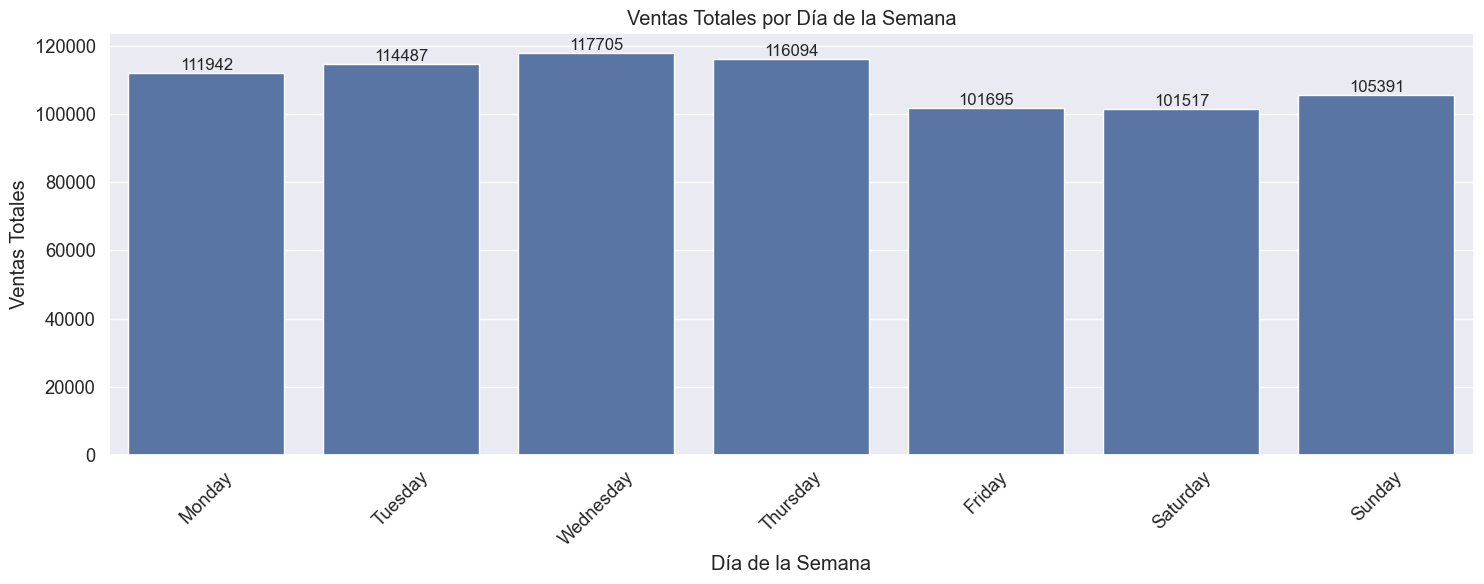

In [36]:
# ventas por dia de la semana
plt.figure(figsize=(15, 6))
ventas_por_dia_semana = df.groupby('dia_semana')['total_sales'].sum().reset_index()
ax = sns.barplot(x='dia_semana', y='total_sales', data=ventas_por_dia_semana, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- ANALISIS BIVARIANTE ---

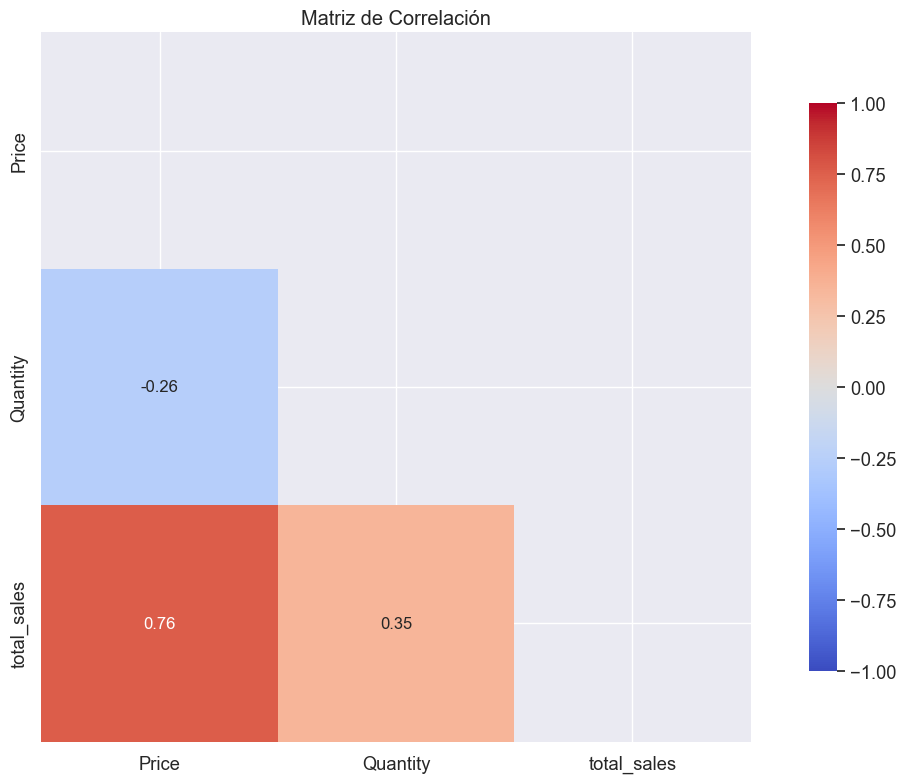

In [39]:
# matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para la parte superior
sns.heatmap(correlation_matrix,mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

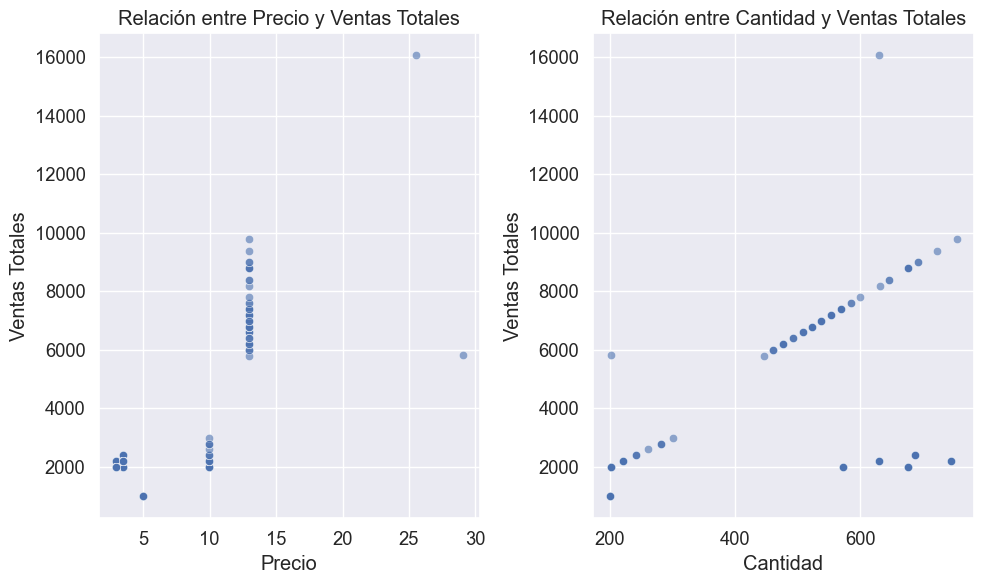

In [43]:
# scatter plot para analizar la relación entre 'Price' y 'total_sales'
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.scatterplot(x='Price', y='total_sales', data=df, alpha=0.6)
plt.title('Relación entre Precio y Ventas Totales')
plt.xlabel('Precio')
plt.ylabel('Ventas Totales')

plt.subplot(1,2,2)
sns.scatterplot(x='Quantity', y='total_sales', data=df, alpha=0.6)
plt.title('Relación entre Cantidad y Ventas Totales')
plt.xlabel('Cantidad')
plt.ylabel('Ventas Totales')

plt.grid(True)
plt.tight_layout()

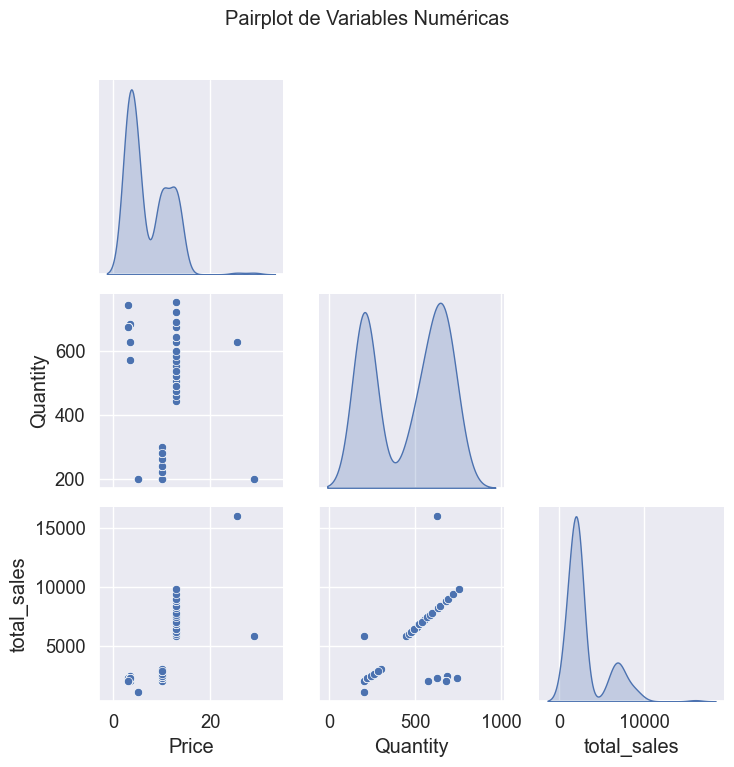

In [45]:
# pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(df[numeric_columns], diag_kind='kde', markers='o', corner=True, height=2.5)
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.tight_layout()
plt.show()

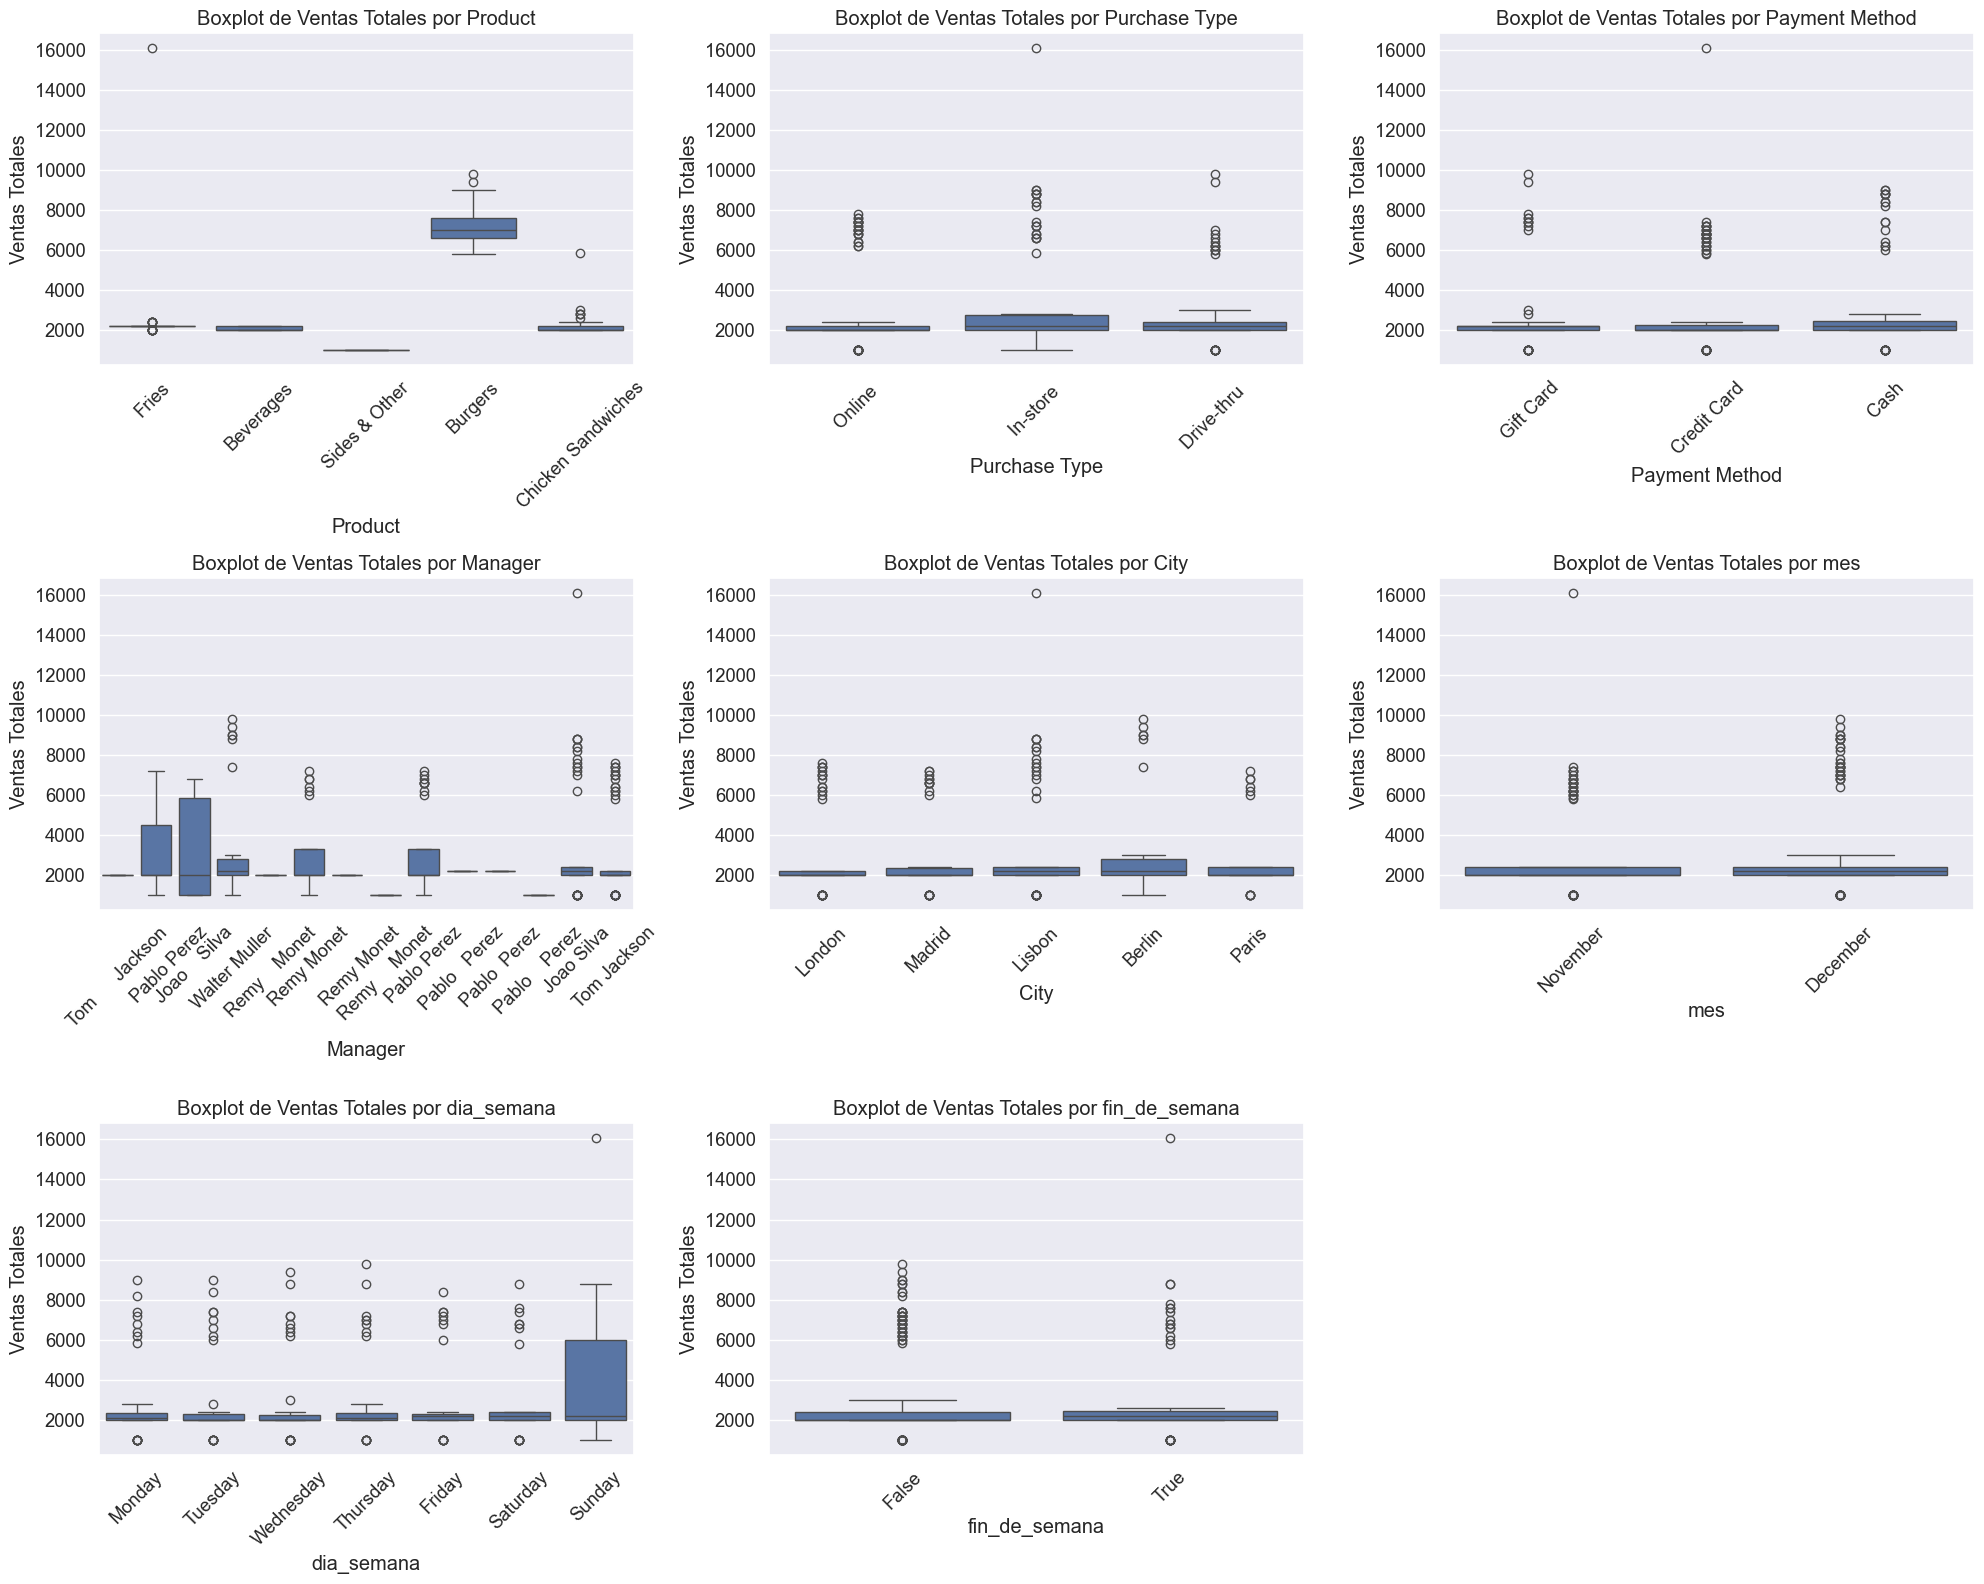

In [76]:
# boxplot para analizar variables categóricas
plt.figure(figsize=(20, 16))
for i, col in enumerate(columns_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], y='total_sales', data=df)
    plt.title(f'Boxplot de Ventas Totales por {col}')
    plt.xlabel(col)
    plt.ylabel('Ventas Totales')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

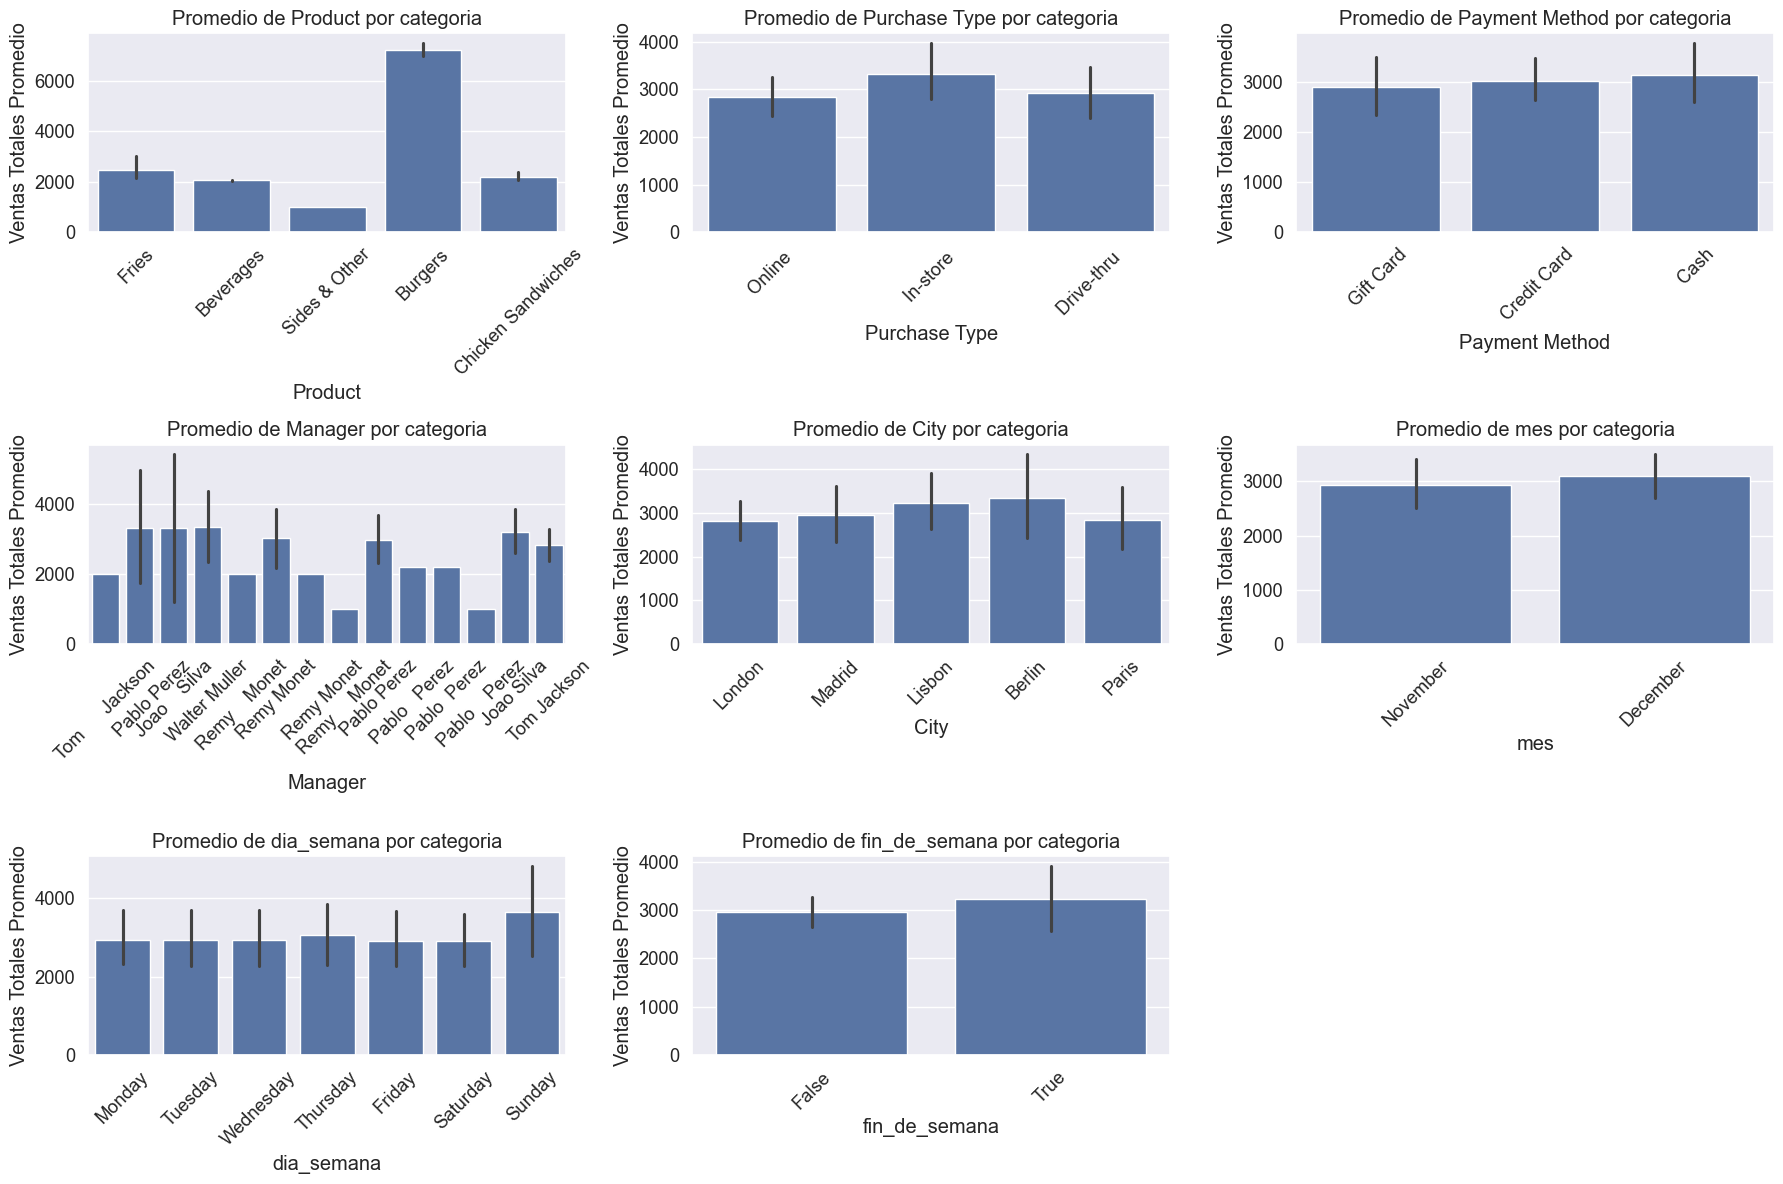

In [78]:
# barplot para promedios por categoría
plt.figure(figsize=(18, 12))
for i, col in enumerate(columns_categoricas, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df[col], y='total_sales', data=df, estimator=np.mean)
    plt.title(f'Promedio de {col} por categoria')
    plt.xlabel(col)
    plt.ylabel('Ventas Totales Promedio')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
print(df.head(10))

   Order ID       Date             Product  Price  Quantity Purchase Type  \
0     10452 2022-11-07               Fries   3.49       573       Online    
1     10453 2022-11-07           Beverages   2.95       745       Online    
2     10454 2022-11-07       Sides & Other   4.99       200     In-store    
3     10455 2022-11-08             Burgers  12.99       569     In-store    
4     10456 2022-11-08  Chicken Sandwiches   9.95       201     In-store    
5     10457 2022-11-08               Fries   3.49       573     In-store    
6     10459 2022-11-08       Sides & Other   4.99       200     In-store    
7     10460 2022-11-09             Burgers  12.99       554     In-store    
8     10461 2022-11-09  Chicken Sandwiches   9.95       201     In-store    
9     10462 2022-11-09               Fries   3.49       573     In-store    

  Payment Method             Manager    City  total_sales       mes   año  \
0      Gift Card    Tom      Jackson  London      1999.77  November  2022  


Tabla de contingencia entre Product y Purchase Type:
Purchase Type       Drive-thru   In-store    Online 
Product                                             
Beverages              0.240000   0.320000  0.440000
Burgers                0.250000   0.346154  0.403846
Chicken Sandwiches     0.250000   0.346154  0.403846
Fries                  0.215686   0.352941  0.431373
Sides & Other          0.244898   0.326531  0.428571
Purchase Type       Drive-thru   In-store   Online 
Product                                            
Beverages                 24.00      32.00    44.00
Burgers                   25.00      34.62    40.38
Chicken Sandwiches        25.00      34.62    40.38
Fries                     21.57      35.29    43.14
Sides & Other             24.49      32.65    42.86


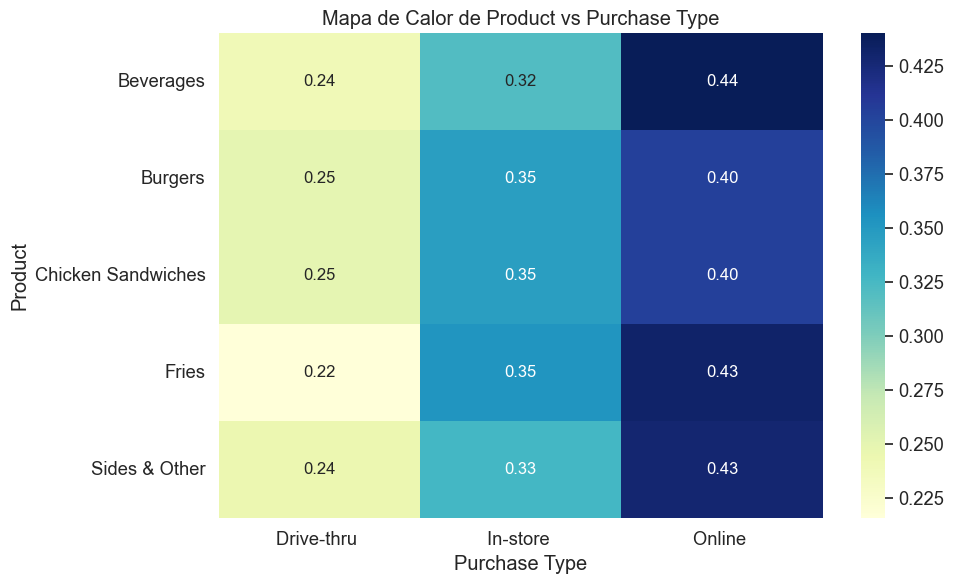


Tabla de contingencia entre Product y mes:
mes                 December  November
Product                               
Beverages           0.560000  0.440000
Burgers             0.557692  0.442308
Chicken Sandwiches  0.557692  0.442308
Fries               0.549020  0.450980
Sides & Other       0.551020  0.448980
mes                 December  November
Product                               
Beverages              56.00     44.00
Burgers                55.77     44.23
Chicken Sandwiches     55.77     44.23
Fries                  54.90     45.10
Sides & Other          55.10     44.90


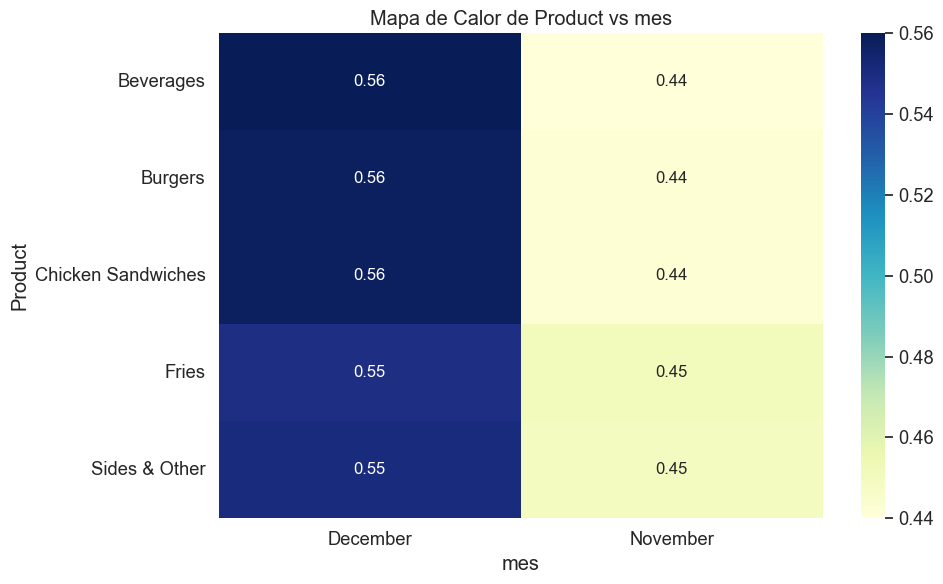


Tabla de contingencia entre Product y City:
City                  Berlin    Lisbon    London    Madrid     Paris
Product                                                             
Beverages           0.120000  0.320000  0.280000  0.180000  0.100000
Burgers             0.115385  0.269231  0.288462  0.211538  0.115385
Chicken Sandwiches  0.115385  0.288462  0.307692  0.173077  0.115385
Fries               0.117647  0.294118  0.313725  0.156863  0.117647
Sides & Other       0.122449  0.306122  0.285714  0.183673  0.102041
City                Berlin  Lisbon  London  Madrid  Paris
Product                                                  
Beverages            12.00   32.00   28.00   18.00  10.00
Burgers              11.54   26.92   28.85   21.15  11.54
Chicken Sandwiches   11.54   28.85   30.77   17.31  11.54
Fries                11.76   29.41   31.37   15.69  11.76
Sides & Other        12.24   30.61   28.57   18.37  10.20


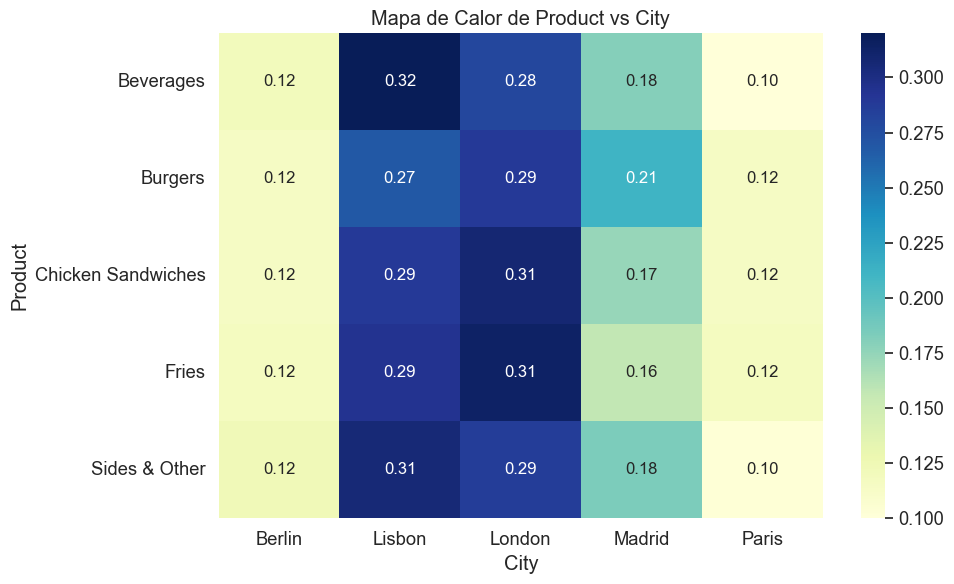


Tabla de contingencia entre Purchase Type y City:
City             Berlin    Lisbon    London    Madrid     Paris
Purchase Type                                                  
Drive-thru     0.163934  0.131148  0.180328  0.327869  0.196721
In-store       0.232558  0.406977  0.000000  0.290698  0.069767
Online         0.000000  0.299065  0.598131  0.009346  0.093458
City           Berlin  Lisbon  London  Madrid  Paris
Purchase Type                                       
Drive-thru      16.39   13.11   18.03   32.79  19.67
In-store        23.26   40.70    0.00   29.07   6.98
Online           0.00   29.91   59.81    0.93   9.35


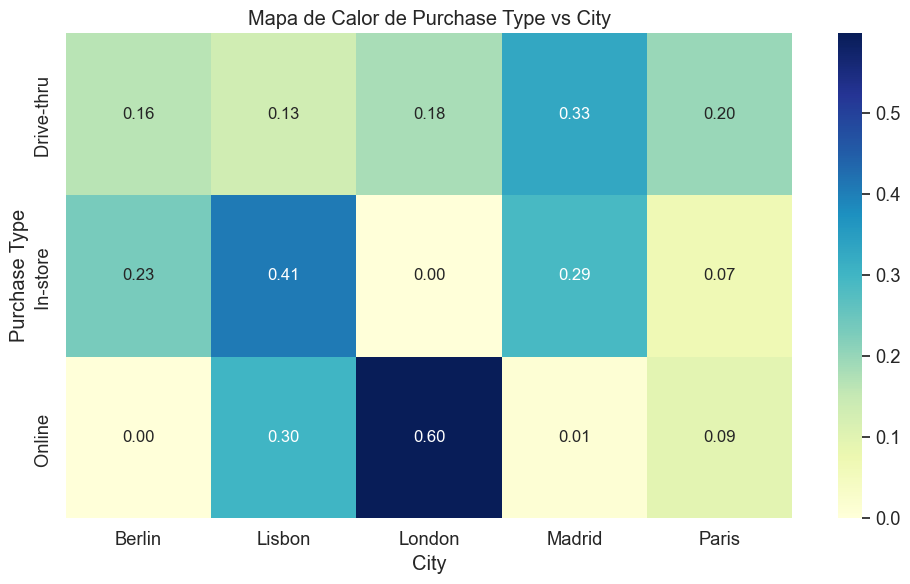


Tabla de contingencia entre mes y City:
City        Berlin    Lisbon    London   Madrid     Paris
mes                                                      
December  0.191489  0.418440  0.319149  0.00000  0.070922
November  0.026549  0.141593  0.265487  0.40708  0.159292
City      Berlin  Lisbon  London  Madrid  Paris
mes                                            
December   19.15   41.84   31.91    0.00   7.09
November    2.65   14.16   26.55   40.71  15.93


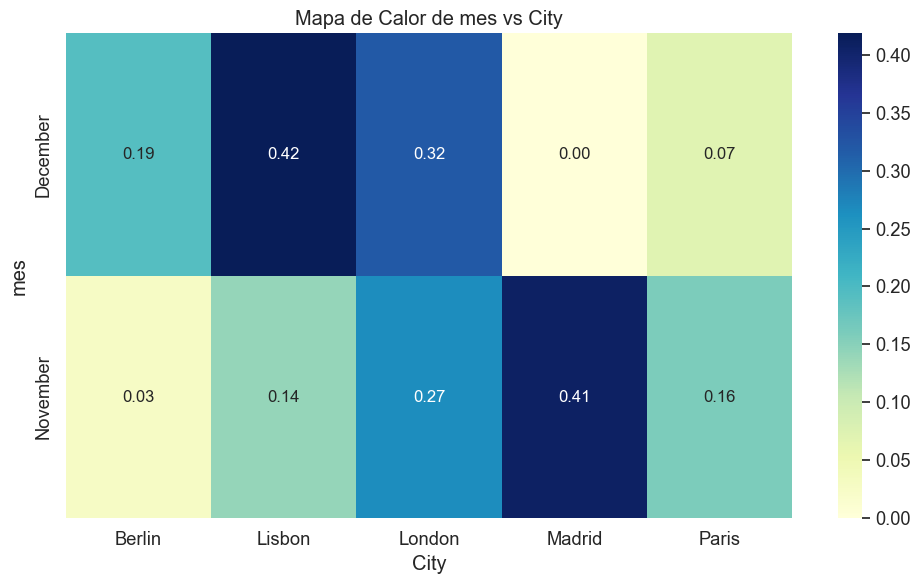


Tabla de contingencia entre Product y fin_de_semana:
fin_de_semana          False     True 
Product                               
Beverages           0.760000  0.240000
Burgers             0.730769  0.269231
Chicken Sandwiches  0.730769  0.269231
Fries               0.764706  0.235294
Sides & Other       0.755102  0.244898
fin_de_semana       False  True 
Product                         
Beverages           76.00  24.00
Burgers             73.08  26.92
Chicken Sandwiches  73.08  26.92
Fries               76.47  23.53
Sides & Other       75.51  24.49


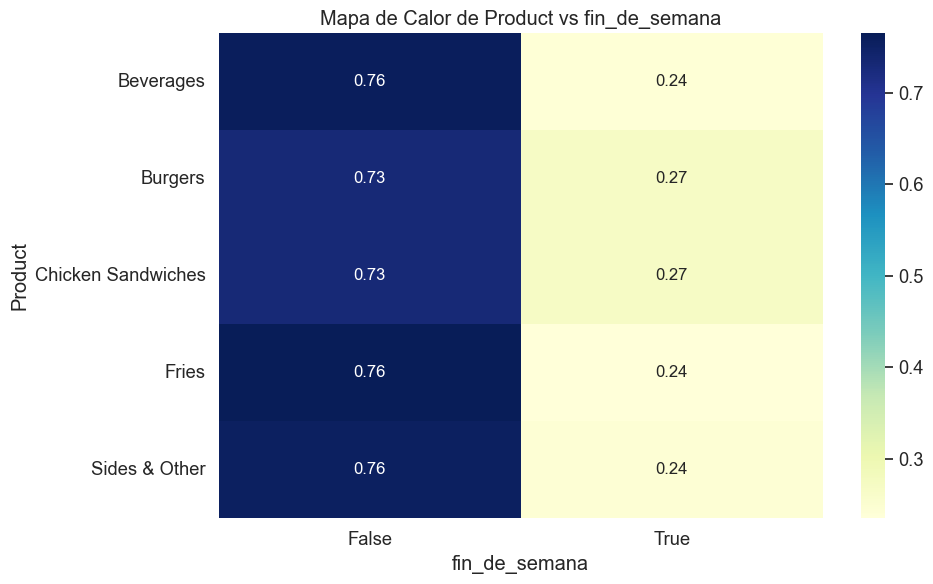


Tabla de contingencia entre Purchase Type y fin_de_semana:
fin_de_semana     False     True 
Purchase Type                    
Drive-thru     0.770492  0.229508
In-store       0.767442  0.232558
Online         0.719626  0.280374
fin_de_semana  False  True 
Purchase Type              
Drive-thru     77.05  22.95
In-store       76.74  23.26
Online         71.96  28.04


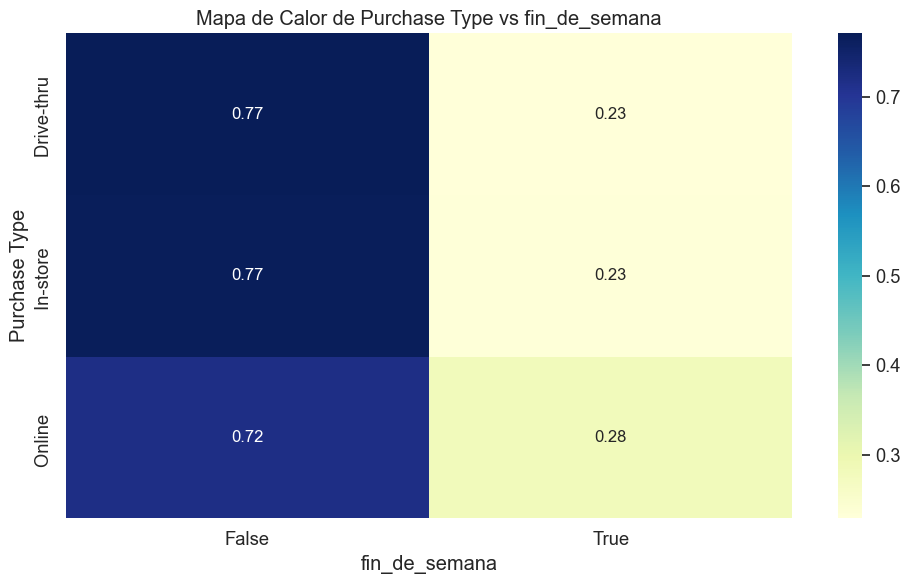


Tabla de contingencia entre Manager y Product:
Product             Beverages   Burgers  Chicken Sandwiches     Fries  \
Manager                                                                 
       Pablo Perez   0.428571  0.285714            0.142857  0.000000   
       Remy Monet    0.500000  0.000000            0.000000  0.500000   
Joao    Silva        0.200000  0.200000            0.200000  0.000000   
Joao Silva           0.214286  0.185714            0.200000  0.214286   
Pablo    Perez       0.000000  0.000000            0.000000  0.000000   
Pablo   Perez        0.000000  0.000000            0.000000  1.000000   
Pablo  Perez         0.000000  0.000000            0.000000  1.000000   
Pablo Perez          0.166667  0.250000            0.222222  0.166667   
Remy     Monet       0.000000  0.000000            0.000000  0.000000   
Remy    Monet        0.000000  0.000000            0.000000  1.000000   
Remy Monet           0.166667  0.250000            0.250000  0.166667   
Tom

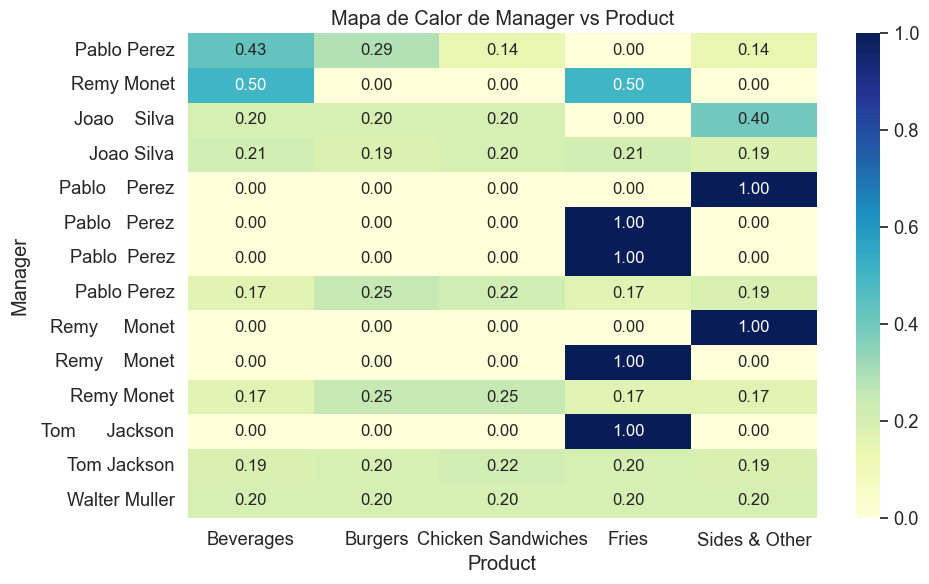


Tabla de contingencia entre Manager y City:
City                Berlin  Lisbon  London  Madrid  Paris
Manager                                                  
       Pablo Perez     0.0     0.0     0.0     1.0    0.0
       Remy Monet      0.0     0.0     0.0     0.0    1.0
Joao    Silva          0.0     1.0     0.0     0.0    0.0
Joao Silva             0.0     1.0     0.0     0.0    0.0
Pablo    Perez         0.0     0.0     0.0     1.0    0.0
Pablo   Perez          0.0     0.0     0.0     1.0    0.0
Pablo  Perez           0.0     0.0     0.0     1.0    0.0
Pablo Perez            0.0     0.0     0.0     1.0    0.0
Remy     Monet         0.0     0.0     0.0     0.0    1.0
Remy    Monet          0.0     0.0     0.0     0.0    1.0
Remy Monet             0.0     0.0     0.0     0.0    1.0
Tom      Jackson       0.0     0.0     1.0     0.0    0.0
Tom Jackson            0.0     0.0     1.0     0.0    0.0
Walter Muller          1.0     0.0     0.0     0.0    0.0
City                Berlin 

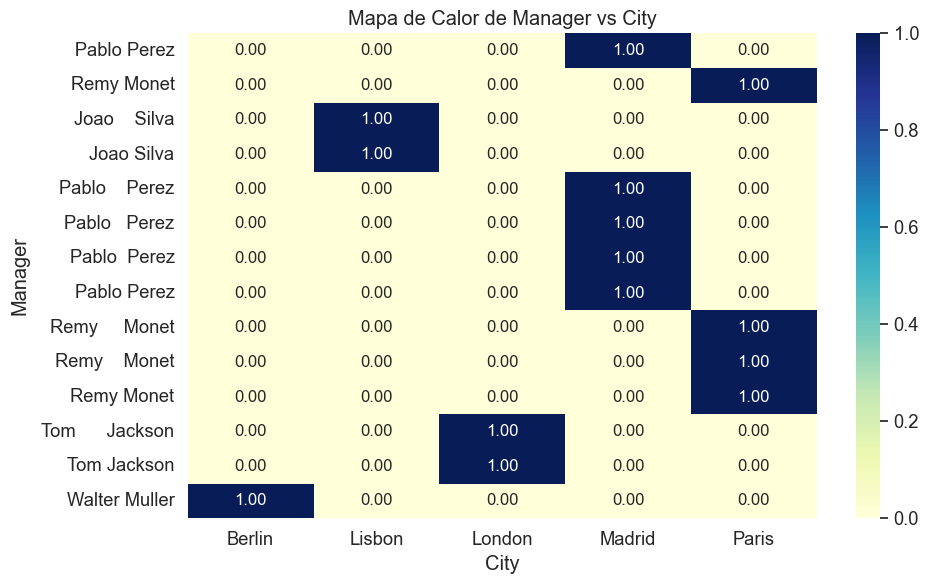


Tabla de contingencia entre Manager y mes:
mes                 December  November
Manager                               
       Pablo Perez  0.000000  1.000000
       Remy Monet   0.000000  1.000000
Joao    Silva       0.000000  1.000000
Joao Silva          0.842857  0.157143
Pablo    Perez      0.000000  1.000000
Pablo   Perez       0.000000  1.000000
Pablo  Perez        0.000000  1.000000
Pablo Perez         0.000000  1.000000
Remy     Monet      0.000000  1.000000
Remy    Monet       0.000000  1.000000
Remy Monet          0.416667  0.583333
Tom      Jackson    0.000000  1.000000
Tom Jackson         0.608108  0.391892
Walter Muller       0.900000  0.100000
mes                 December  November
Manager                               
       Pablo Perez      0.00    100.00
       Remy Monet       0.00    100.00
Joao    Silva           0.00    100.00
Joao Silva             84.29     15.71
Pablo    Perez          0.00    100.00
Pablo   Perez           0.00    100.00
Pablo  Perez        

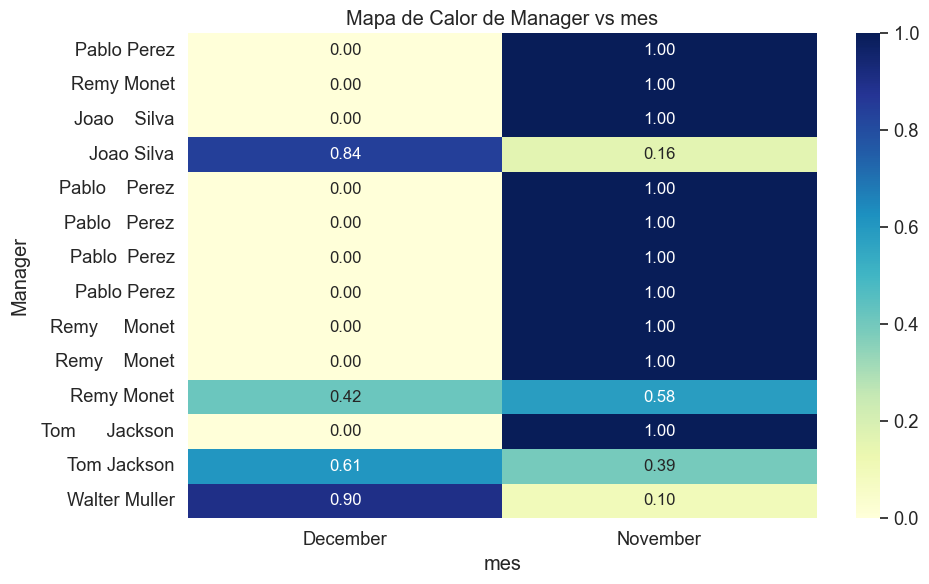

In [89]:
# tabla de contingencia para analizar la relación entre dos variables categóricas
cat_col_pair = [
        ('Product', 'Purchase Type'),
        ('Product', 'mes'),
        ('Product', 'City'),
        ('Purchase Type', 'City'),
        ('mes', 'City'),
        ('Product', 'fin_de_semana'),
        ('Purchase Type', 'fin_de_semana'),
        ('Manager', 'Product'),
        ('Manager', 'City'),
        ('Manager', 'mes'),
    ]       
for col1, col2 in cat_col_pair:
    # tabla de contingencia
    contingency_table = pd.crosstab(df[col1], df[col2], normalize='index')
    print(f'\nTabla de contingencia entre {col1} y {col2}:\n{contingency_table}')
    print((contingency_table * 100).round(2))  # Mostrar en porcentaje
    # mapa de calor 
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title(f'Mapa de Calor de {col1} vs {col2}')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.tight_layout()
    plt.show()

--- ANÁLISIS MULTIVARIANTE ---

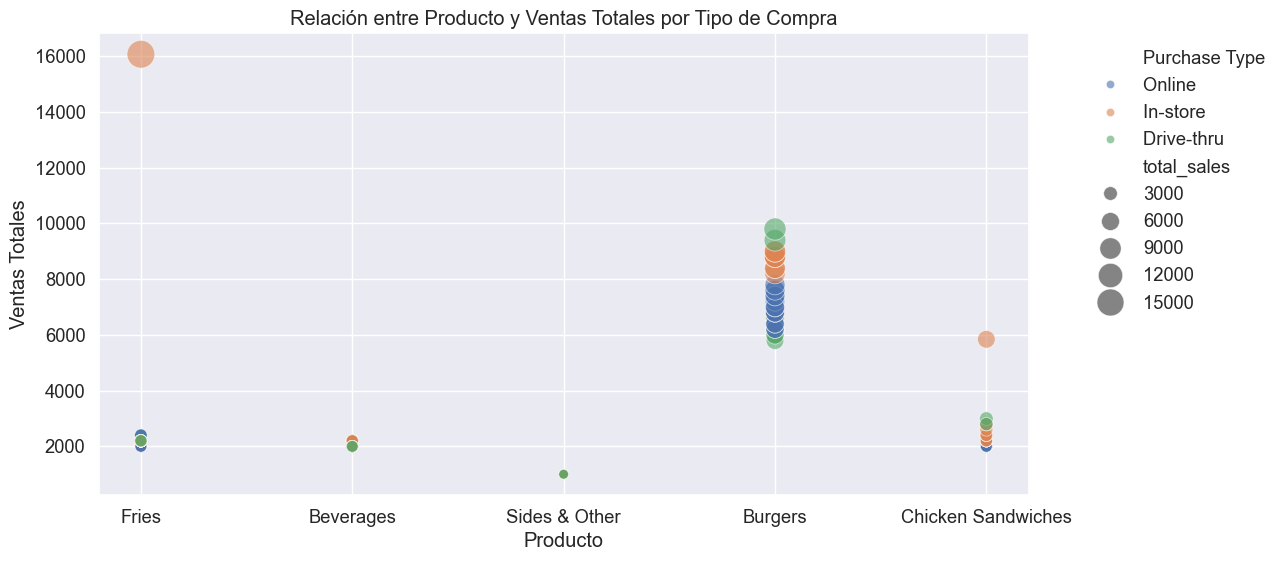

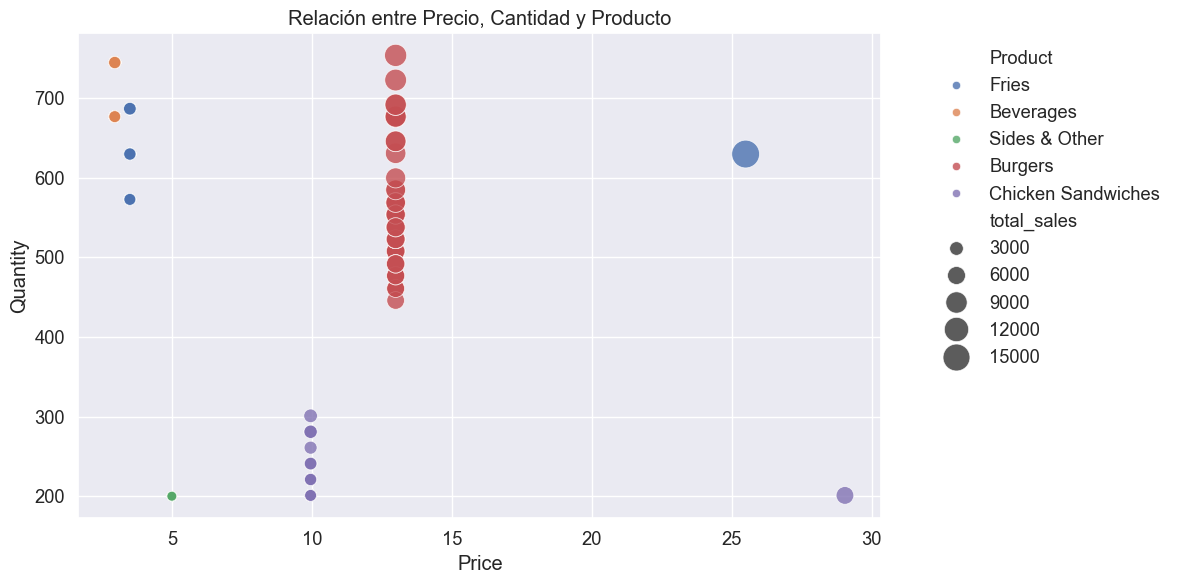

In [106]:
# scatter plot para variables catégoricas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Product', y='total_sales',hue='Purchase Type',
                data=df,size='total_sales',sizes=(50,400),alpha=0.6)
plt.title('Relación entre Producto y Ventas Totales por Tipo de Compra')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

# scatter plot para variables catégoricas
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Quantity',
                hue='Product', data=df, size='total_sales', sizes=(50,400), alpha=0.8)
plt.title('Relación entre Precio, Cantidad y Producto')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()

